<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/gender_voice_dataset.csv') # Gender Voice Dataset
data.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1872,0.148975,0.087243,0.190420,0.050795,0.217945,0.167149,2.138170,8.352815,0.939007,0.622045,...,0.148975,0.183926,0.081633,0.242424,0.407484,0.007812,3.117188,3.109375,0.176471,female
444,0.187127,0.059577,0.209517,0.132276,0.233655,0.101379,1.879900,6.761890,0.914311,0.482246,...,0.187127,0.110099,0.062745,0.155340,0.546875,0.164062,2.625000,2.460938,0.233016,male
1424,0.191088,0.059123,0.200675,0.156762,0.237504,0.080742,0.759968,2.603362,0.930385,0.451028,...,0.191088,0.134565,0.048193,0.275862,1.612165,0.023438,5.601562,5.578125,0.144106,male
2259,0.143133,0.088920,0.175501,0.050247,0.218830,0.168583,1.073173,3.971287,0.966103,0.767905,...,0.143133,0.164229,0.021592,0.266667,0.735840,0.007812,3.578125,3.570312,0.285339,female
1524,0.155083,0.069933,0.140259,0.107918,0.219123,0.111204,5.448489,58.052852,0.887048,0.463191,...,0.155083,0.109726,0.015936,0.271186,0.090732,0.007812,0.632812,0.625000,0.132738,male
1639,0.163785,0.067437,0.163309,0.141287,0.211931,0.070644,2.984360,14.447494,0.949167,0.698218,...,0.163785,0.140512,0.016194,0.235294,0.189062,0.007812,0.367188,0.359375,0.333851,female
969,0.189983,0.060065,0.192221,0.133701,0.244238,0.110537,1.406457,4.461628,0.903181,0.333160,...,0.189983,0.122174,0.047198,0.266667,0.735539,0.023438,5.625000,5.601562,0.092663,male
407,0.186411,0.064738,0.204231,0.136538,0.237308,0.100769,1.615809,5.461153,0.921531,0.501477,...,0.186411,0.121836,0.022409,0.231884,0.805469,0.148438,3.804688,3.656250,0.308704,male
647,0.171713,0.061671,0.189894,0.152660,0.207766,0.055106,2.818282,11.990365,0.920936,0.553174,...,0.171713,0.177866,0.027165,0.271186,1.133854,0.031250,5.789062,5.757812,0.198301,male
1122,0.186150,0.055903,0.189562,0.142044,0.235547,0.093504,0.851722,2.900995,0.924422,0.444776,...,0.186150,0.128891,0.047291,0.275862,1.298564,0.023438,8.929688,8.906250,0.165461,male


In [21]:
data.shape

(3168, 21)

In [22]:
data.describe().T # T is for transposing the data

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [23]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder() # instantiate Label Encoder object
data['label'] = labelEncoder.fit_transform(data['label'].astype(str))

data['label'].sample(10)

1922    0
1555    1
1657    0
925     1
2039    0
2969    0
1022    1
2234    0
106     1
1525    1
Name: label, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

features = data.drop('label', axis=1) # save all other columns to features
target = data['label']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2) # 80% training, 20% test

In [25]:
X_train.shape, y_train.shape

((2534, 20), (2534,))

In [26]:
X_test.shape, y_test.shape 

((634, 20), (634,))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# liblinear works well for small data sets
# penalty is set to l2 (that's L2), this penalizes overly complex models
logicstic_model = LogisticRegression(penalty='l2', solver='liblinear') # instantiate Logistic Regression object 

logicstic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
y_pred = logicstic_model.predict(X_test)

In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[264  57]
 [ 13 300]]


In [30]:
print("Training score: ", logicstic_model.score(X_train, y_train))

Training score:  0.9127861089187056


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision Score: ', pre)
print('Recall Score: ', recall)

Accuracy:  0.889589905362776
Precision Score:  0.8403361344537815
Recall Score:  0.9584664536741214


In [32]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

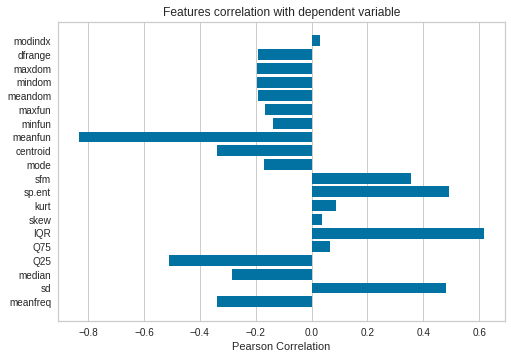

In [33]:
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(features, target)

visualizer.poof()

In [34]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [35]:
select_univariate = SelectKBest(chi2, k=4).fit(features, target) # select 4 most relevant features

In [36]:
features_mask = select_univariate.get_support()

features_mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False])

In [37]:
selected_columns = features.columns[features_mask]

selected_columns

Index(['kurt', 'meandom', 'maxdom', 'dfrange'], dtype='object')

In [38]:
selected_features = features[selected_columns]
selected_features.head()

,kurt,meandom,maxdom,dfrange
0,274.402905,0.007812,0.007812,0.000000
1,634.613855,0.009014,0.054688,0.046875
2,1024.927705,0.007990,0.015625,0.007812
3,4.177296,0.201497,0.562500,0.554688
4,4.333713,0.712812,5.484375,5.476562


In [39]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2) # split the data into training and test data  

In [40]:
from sklearn.linear_model import LogisticRegression

logicstic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [41]:
y_pred = logicstic_model.predict(X_test)

In [42]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision Score: ', pre)
print('Recall Score: ', recall)

Accuracy:  0.6072555205047319
Precision Score:  0.636085626911315
Recall Score:  0.6153846153846154


Let's see if we can get a more accurate result using f_classif instead of chi2

In [43]:
select_univariate = SelectKBest(f_classif, k=4).fit(features, target) # select 4 most relevant features

In [44]:
features_mask = select_univariate.get_support()

features_mask

array([False, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [45]:
selected_columns = features.columns[features_mask]

selected_columns

Index(['Q25', 'IQR', 'sp.ent', 'meanfun'], dtype='object')

In [46]:
selected_features = features[selected_columns]
selected_features.head()

,Q25,IQR,sp.ent,meanfun
0,0.015071,0.075122,0.893369,0.084279
1,0.019414,0.073252,0.892193,0.107937
2,0.008701,0.123207,0.846389,0.098706
3,0.096582,0.111374,0.963322,0.088965
4,0.078720,0.127325,0.971955,0.106398


In [47]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2) # split the data into training and test data  

In [48]:
from sklearn.linear_model import LogisticRegression

logicstic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [49]:
y_pred = logicstic_model.predict(X_test)

In [50]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision Score: ', pre)
print('Recall Score: ', recall) 
# We went from having a score of around 60% to around 90% or higher, this is much better

Accuracy:  0.9085173501577287
Precision Score:  0.8666666666666667
Recall Score:  0.975975975975976


This time let's try it with mutual_info_classif

In [51]:
select_univariate = SelectKBest(mutual_info_classif, k=4).fit(features, target) # select 4 most relevant features

In [52]:
features_mask = select_univariate.get_support()

features_mask

array([False,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [53]:
selected_columns = features.columns[features_mask]

selected_columns

Index(['sd', 'Q25', 'IQR', 'meanfun'], dtype='object')

In [55]:
selected_features = features[selected_columns]
selected_features.head()

,sd,Q25,IQR,meanfun
0,0.064241,0.015071,0.075122,0.084279
1,0.067310,0.019414,0.073252,0.107937
2,0.083829,0.008701,0.123207,0.098706
3,0.072111,0.096582,0.111374,0.088965
4,0.079146,0.078720,0.127325,0.106398


In [56]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2) # split the data into training and test data  

In [57]:
from sklearn.linear_model import LogisticRegression

logicstic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [58]:
y_pred = logicstic_model.predict(X_test)

In [59]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision Score: ', pre)
print('Recall Score: ', recall) 
# We went from having a score of around 60% to around 90% or higher, this is much better

Accuracy:  0.9100946372239748
Precision Score:  0.857566765578635
Recall Score:  0.9697986577181208
